# Zarr Demo

The following notebook illustrates the makeup and usage of zarr files with an example based on commonly used climate model output from the [pangeo cmip6 cloud archive](https://pangeo-data.github.io/pangeo-cmip6-cloud/accessing_data.html#opening-a-single-zarr-data-store)..

In [124]:
import gcsfs

# a CMIP6 zarr store
store = 'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/'

# Connect to Google Cloud Storage
fs = gcsfs.GCSFileSystem(token='anon', access='read_only')

# create a MutableMapping from a store URL
mapper = fs.get_mapper(store)

Using zarr a dataset not a single file, but instead is a folder with subfolders and files within.

In [125]:
# list the content of the zarr store
lst = fs.ls(store, detail=False)
lst

['cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.zattrs',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.zgroup',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.zmetadata',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/lat',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/lat_bnds',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/lev',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/lev_bnds',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/lon',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/lon_bnds',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/the

This full structure is called a 'zarr group', representing several data arrays ('zarr arrays').
Each array represent n-dimensional arrays which are chunked. Lets investigate an example array `thetao`.

In [126]:
fs.ls('cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao', detail=False)

['cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/.zarray',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/.zattrs',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/0.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/1.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/10.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/100.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/101.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/102.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/103.0.0.0',
 'cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v2019072

Data is stored for each chunk enumerated (xx.xx.xx.xx) along the dimensions of the array. We can guess that the data has 4 dimensions and is chunked along the first one (time in this case). All this information and other info like e.g. the compression are contained in the `.zarray` file.

In [127]:
def print_content(url):
    with fs.open(url, 'rb') as f:
        print(f.read().decode('utf-8'))

In [128]:
print_content('cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/.zarray')

{
    "chunks": [
        12,
        35,
        180,
        360
    ],
    "compressor": {
        "blocksize": 0,
        "clevel": 5,
        "cname": "lz4",
        "id": "blosc",
        "shuffle": 1
    },
    "dtype": "<f4",
    "fill_value": 1.0000000200408773e+20,
    "filters": null,
    "order": "C",
    "shape": [
        1980,
        35,
        180,
        360
    ],
    "zarr_format": 2
}


The `.zattrs` file contains metadata specific to the array (for instance variable units).

In [129]:
print_content('cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/thetao/.zattrs')

{
    "_ARRAY_DIMENSIONS": [
        "time",
        "lev",
        "lat",
        "lon"
    ],
    "cell_measures": "area: areacello volume: volcello",
    "cell_methods": "area: mean where sea time: mean",
    "comment": "Model data on the 1x1 grid includes values in all cells for which any ocean exists on the native grid. For mapping purposes, we recommend using a land mask such as World Ocean Atlas to cover these areas of partial land.  For calculating approximate integrals, we recommend multiplying by cell volume (volcello).",
    "interp_method": "conserve_order1",
    "long_name": "Sea Water Potential Temperature",
    "original_name": "thetao",
    "standard_name": "sea_water_potential_temperature",
    "units": "degC"
}


Going back to the group level, each group also contains a metadata file `.zattrs`

In [130]:
print_content('cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.zattrs')

{"Conventions": "CF-1.7 CMIP-6.0 UGRID-1.0", "activity_id": "CMIP", "branch_method": "standard", "branch_time_in_child": 0.0, "branch_time_in_parent": 36500.0, "comment": "<null ref>", "contact": "gfdl.climate.model.info@noaa.gov", "coordinates": "time_bnds lon_bnds lat_bnds lev_bnds", "creation_date": "2019-08-03T00:22:55Z", "data_specs_version": "01.00.27", "experiment": "all-forcing simulation of the recent past", "experiment_id": "historical", "external_variables": "areacello volcello", "forcing_index": 1, "frequency": "mon", "further_info_url": "https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GFDL-ESM4.historical.none.r1i1p1f1", "grid": "ocean data regridded from tripolar - nominal 0.5 deg latitude/longitude to 180,360; interpolation method: conserve_order1", "grid_label": "gr", "history": "File was processed by fremetar (GFDL analog of CMOR). TripleID: [exper_id_MFLg3OOf97,realiz_id_6UiFuoEKMa,run_id_PhuSv75why]", "initialization_index": 1, "institution": "National Oceanic and Atm

`.zgroup` must only contain the zarr storage version used [see here](https://zarr.readthedocs.io/en/stable/spec/v2.html?highlight=.zgroup#groups)

**@rabernat**: Is this correct?

In [131]:
print_content('cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.zgroup')

{
    "zarr_format": 2
}


### Consolidated metadata
Zarr offers the functionality to [consolidate](https://zarr.readthedocs.io/en/stable/api/convenience.html?highlight=consolidate#zarr.convenience.consolidate_metadata) the metadata of a group to enable even faster lazy access (more on that in a bit). The information is stored in `.zmetadata`.

In [132]:
print_content('cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Omon/thetao/gr/v20190726/.zmetadata')

{
    "metadata": {
        ".zattrs": {
            "Conventions": "CF-1.7 CMIP-6.0 UGRID-1.0",
            "activity_id": "CMIP",
            "branch_method": "standard",
            "branch_time_in_child": 0.0,
            "branch_time_in_parent": 36500.0,
            "comment": "<null ref>",
            "contact": "gfdl.climate.model.info@noaa.gov",
            "coordinates": "time_bnds lon_bnds lat_bnds lev_bnds",
            "creation_date": "2019-08-03T00:22:55Z",
            "data_specs_version": "01.00.27",
            "experiment": "all-forcing simulation of the recent past",
            "experiment_id": "historical",
            "external_variables": "areacello volcello",
            "forcing_index": 1,
            "frequency": "mon",
            "further_info_url": "https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GFDL-ESM4.historical.none.r1i1p1f1",
            "grid": "ocean data regridded from tripolar - nominal 0.5 deg latitude/longitude to 180,360; interpolation method: 

## Accesing zarr files

### Directly with Zarr

In [133]:
import zarr

zstore = zarr.open_group(mapper)

zstore.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,fsspec.mapping.FSMap
No. members,9
No. arrays,9
No. groups,0
Arrays,"lat, lat_bnds, lev, lev_bnds, lon, lon_bnds, thetao, time, time_bnds"


Lets access the `thetao` array

In [134]:
zstore.thetao

<zarr.core.Array '/thetao' (1980, 35, 180, 360) float32>

@rabernat: I am actually not entirely sure how to access the zarr data from here? Let me know if this is at all useful.

Lets inspect the first chunk:

In [135]:
data = zstore.thetao.get_basic_selection(1)

In [136]:
import matplotlib.pyplot as plt

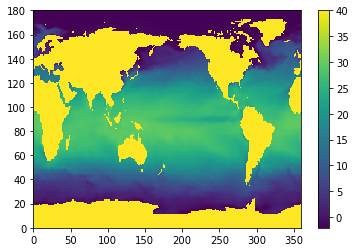

In [137]:
plt.pcolor(data[0,:,:], vmax=40)
plt.colorbar()

### Opening zarr with xarray

In [138]:
import xarray as xr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    contact:                gfdl.climate.model.info@noaa.gov
    creation_date:          2019-08-03T00:22:55Z
    data_specs_version:     01.00.27
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello volcello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GF...
    grid:                   ocean data regridded from tripolar - nominal 0.5 ...
    grid_label:             gr
    history:                File was processed by fremetar (GFDL analog of CM...
    initialization_index:   1
    institution:            National Oceanic and Atmospheric Administration, ...
    institution_id:         NOAA-GFDL
    license:                CMIP6 model data produced by NOAA-GFDL is license...
    mip_era:                CMIP6
    nominal_resolution:     1x1 degree
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       GFDL-ESM4
    parent_time_units:      days since 0001-1-1
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  ocean
    references:             see further_info_url attribute
    source:                 GFDL-ESM4 (2018):\natmos: GFDL-AM4.1 (Cubed-spher...
    source_id:              GFDL-ESM4
    source_type:            AOGCM AER CHEM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/248958fd-cc5a-4876-a4b6-61edc24d6ddc...
    variable_id:            thetao
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/248958fd-cc5a-4876-a4b6-61edc24d6ddc...
    version_id:             v20190726

Note that the file opened virtually instantaneous. This is due to the fact that we are working with a 'consolidated' zarr store, hence only one file has to be read to 'understand' the shape and metadata of the group (dataset in xarray lingo). 
None of the actual data is loaded at this point. Except for the dimension variables, all data is lazily loaded as dask arrays

In [139]:
ds.thetao

,Array,Chunk
Bytes,17.96 GB,108.86 MB
Shape,"(1980, 35, 180, 360)","(12, 35, 180, 360)"
Count,166 Tasks,165 Chunks
Type,float32,numpy.ndarray


xarray uses dask under the hood to load data lazily and parallelize computations across the chunks of each zarr array (Dataarray in xarray lingo)

In [140]:
# Simple computation
mean_thetao = ds.thetao.isel(lev=0, time=slice(0,120)).mean(['lon', 'lat']) #average surface temperature over 10 years
mean_thetao

<xarray.DataArray 'thetao' (time: 120)>
dask.array<mean_agg-aggregate, shape=(120,), dtype=float32, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
    lev      float64 2.5
  * time     (time) object 1850-01-16 12:00:00 ... 1859-12-16 12:00:00

Again this did not yet trigger any computation, but dask builds a graph that shows how each chunk will be processed in parallel.

**@rabernat**: I wasnt able to cull this dask graph for a smaller graph visualization. do you know a quick way to do this? 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.880526 to fit


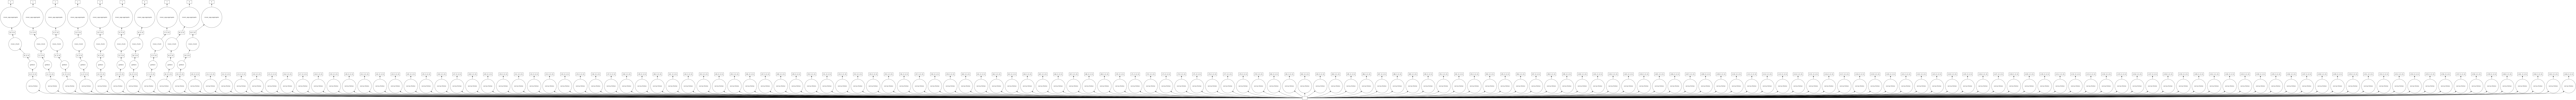

In [141]:
mean_thetao.data.visualize()

Since each chunk contains 12 months worth of data, the computation over 10 years creates 10 branches in the task graph.

Plotting the resulting values finally triggers the computation:

In [ ]:
mean_thetao.plot()